# Case study:  Pairs trading
Richard Sowers
2017-12-09

## imports

In [1]:
import numpy
import pandas
import datetime
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import dateutil
import scipy.stats

## single stock

In [2]:
ticker_A="AAPL"
data_A=pandas.read_csv(ticker_A+".csv",index_col=0)
print(data_A.ix[:20,])
#print(AAPL.columns)
#print(AAPL.index)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2016-01-04  102.610001  105.370003  102.000000  105.349998  101.426033   
2016-01-05  105.750000  105.849998  102.410004  102.709999   98.884369   
2016-01-06  100.559998  102.370003   99.870003  100.699997   96.949242   
2016-01-07   98.680000  100.129997   96.430000   96.449997   92.857529   
2016-01-08   98.550003   99.110001   96.760002   96.959999   93.348541   
2016-01-11   98.970001   99.059998   97.339996   98.529999   94.860062   
2016-01-12  100.550003  100.690002   98.839996   99.959999   96.236794   
2016-01-13  100.320000  101.190002   97.300003   97.389999   93.762527   
2016-01-14   97.959999  100.480003   95.739998   99.519997   95.813171   
2016-01-15   96.199997   97.709999   95.360001   97.129997   93.512207   
2016-01-19   98.410004   98.650002   95.500000   96.660004   93.059715   
2016-01-20   95.099998   98.190002   9

In [3]:
data_A.index=[dateutil.parser.parse(dt) for dt in data_A.index]
print(data_A.ix[:20,:])

                  Open        High         Low       Close   Adj Close  \
2016-01-04  102.610001  105.370003  102.000000  105.349998  101.426033   
2016-01-05  105.750000  105.849998  102.410004  102.709999   98.884369   
2016-01-06  100.559998  102.370003   99.870003  100.699997   96.949242   
2016-01-07   98.680000  100.129997   96.430000   96.449997   92.857529   
2016-01-08   98.550003   99.110001   96.760002   96.959999   93.348541   
2016-01-11   98.970001   99.059998   97.339996   98.529999   94.860062   
2016-01-12  100.550003  100.690002   98.839996   99.959999   96.236794   
2016-01-13  100.320000  101.190002   97.300003   97.389999   93.762527   
2016-01-14   97.959999  100.480003   95.739998   99.519997   95.813171   
2016-01-15   96.199997   97.709999   95.360001   97.129997   93.512207   
2016-01-19   98.410004   98.650002   95.500000   96.660004   93.059715   
2016-01-20   95.099998   98.190002   93.419998   96.790001   93.184875   
2016-01-21   97.059998   97.879997   9

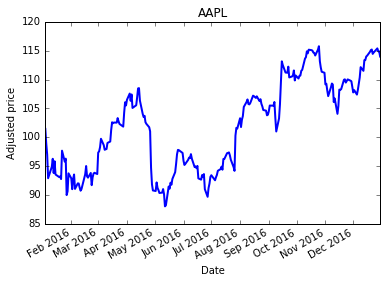

In [4]:
adj_A=pandas.Series(data_A.loc[:,"Adj Close"],name=ticker_A)
fig, ax = plt.subplots()
plt.plot(adj_A.index,adj_A,label=ticker_A,linewidth=2)
plt.ylabel("Adjusted price")
plt.xlabel("Date")
plt.title(ticker_A)
fig.autofmt_xdate()
plt.show()

             Open   High    Low  Close  Adj Close   Volume
2016-12-12  11.91  11.97  11.28  11.51      11.51  1186700
2016-12-13  11.42  11.62  11.18  11.40      11.40   839800
2016-12-14  11.42  11.42  10.52  10.53      10.53  1481800
2016-12-15  10.65  10.72  10.00  10.31      10.31  1916900
2016-12-16  10.17  10.48  10.00  10.41      10.41  1896500
2016-12-19  10.48  10.74  10.01  10.03      10.03  1013700
2016-12-20  10.00  10.46   9.98  10.07      10.07  1079300
2016-12-21  10.02  10.15   9.82   9.89       9.89  1246100
2016-12-22   9.80   9.88   9.32   9.40       9.40  1341000
2016-12-23   9.29   9.55   8.71   8.79       8.79  1787900
2016-12-27   8.83   8.89   8.10   8.29       8.29  2439100
2016-12-28   8.30   8.40   8.00   8.18       8.18  1783300
2016-12-29   8.60   9.00   8.31   9.00       9.00  3245700
2016-12-30   9.00   9.49   8.84   9.29       9.29  2783800
2017-01-03   9.31   9.72   8.95   9.72       9.72  1690800
2017-01-04   9.80  10.38   9.75  10.36      10.36  29734

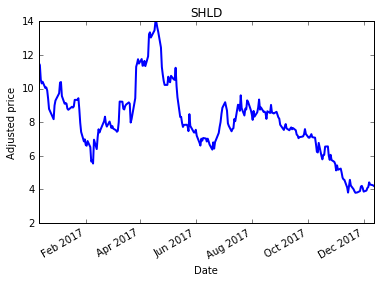

In [5]:
ticker_="SHLD"
data_=pandas.read_csv(ticker_+".csv",index_col=0)
data_.index=[dateutil.parser.parse(dt) for dt in data_.index]
print(data_.ix[:20,])
adj_=pandas.Series(data_.loc[:,"Adj Close"],name=ticker_)
fig, ax = plt.subplots()
plt.plot(adj_.index,adj_,label=ticker_,linewidth=2)
plt.ylabel("Adjusted price")
plt.xlabel("Date")
plt.title(ticker_)
fig.autofmt_xdate()
plt.show()

## pair of stocks

In [6]:
ticker_B="GOOG"
data_B=pandas.read_csv(ticker_B+".csv",index_col=0)
data_B.index=[dateutil.parser.parse(dt) for dt in data_B.index]
adj_B=pandas.Series(data_B.loc[:,"Adj Close"],name=ticker_B)

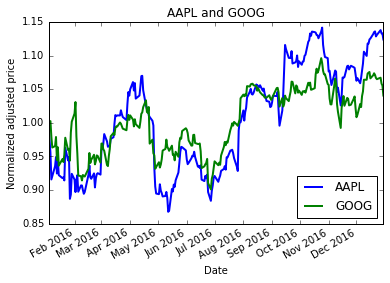

In [7]:
fig, ax = plt.subplots()
normalized_A=adj_A/adj_A.ix[0]
normalized_B=adj_B/adj_B.ix[0]

plt_A,=plt.plot(normalized_A.index,normalized_A,label=ticker_A,linewidth=2)
plt_B,=plt.plot(normalized_B.index,normalized_B,label=ticker_B,linewidth=2)
plt.legend(handles=[plt_A,plt_B],loc="lower right")
plt.ylabel("Normalized adjusted price")
plt.xlabel("Date")
plt.title(ticker_A+" and "+ticker_B)
fig.autofmt_xdate()
plt.show()

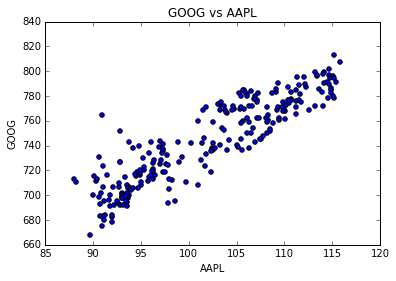

In [8]:
plt.scatter(adj_A,adj_B)
plt.xlabel(ticker_A)
plt.ylabel(ticker_B)
plt.title(ticker_B+" vs "+ticker_A)
plt.show()

## regression

In [9]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
    adj_A,adj_B)
print("slope: "+str(slope))
print("intercept: "+str(intercept))
portfolio=adj_B-adj_A*slope
portfolio.name="Portfolio"
signal=adj_B-(intercept+adj_A*slope)
signal.name="signal"
print(signal.ix[:10])

slope: 3.94479394232
intercept: 341.28355154
2016-01-04     0.451675
2016-01-05    11.218006
2016-01-06    19.891661
2016-01-07    18.802646
2016-01-08     4.945660
2016-01-11     0.543080
2016-01-12     5.152133
2016-01-13   -10.597402
2016-01-14    -4.526797
2016-01-15   -15.719927
Name: signal, dtype: float64


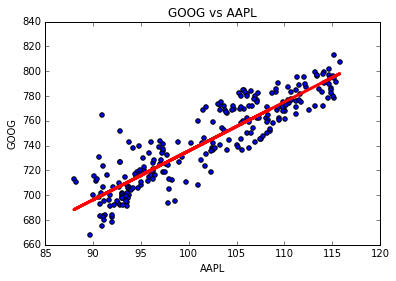

In [10]:
temp=intercept+adj_A*slope
plt.scatter(adj_A,adj_B)
plt.plot(adj_A,temp,color="red",linewidth=3)
plt.xlabel(ticker_A)
plt.ylabel(ticker_B)
plt.title(ticker_B+" vs "+ticker_A)
plt.show()

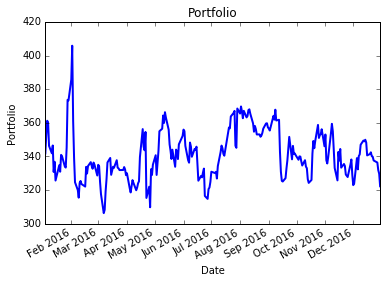

In [11]:
fig, ax = plt.subplots()
plt.plot(portfolio.index,portfolio,label="signal",linewidth=2)
plt.ylabel("Portfolio")
plt.xlabel("Date")
plt.title("Portfolio")
fig.autofmt_xdate()
plt.show()

In [12]:
diff_A=numpy.diff(adj_A)
diff_B=numpy.diff(adj_B)

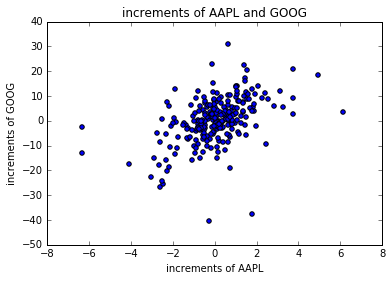

In [13]:
plt.scatter(diff_A,diff_B)
plt.xlabel("increments of "+ticker_A)
plt.ylabel("increments of "+ticker_B)
plt.title("increments of "+ticker_A+" and "+ticker_B)
plt.show()

## signal analysis

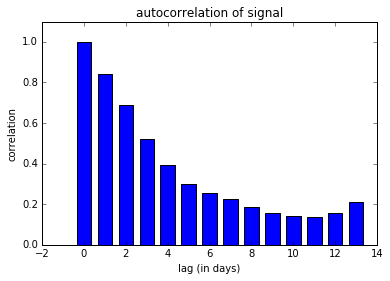

In [14]:
daylag=numpy.arange(14)
acf=numpy.array([portfolio.autocorr(d) for d in daylag])
width=0.7
plt.bar(daylag-width/2, acf, width, color='b')
plt.ylim(0,1.1)
plt.xlabel("lag (in days)")
plt.ylabel("correlation")
plt.title("autocorrelation of signal")
plt.show()

In [15]:
signal_lagged=signal.shift(periods=1)
signal_lagged.name="signal_lagged"
DF=pandas.concat([signal,signal_lagged],axis=1)
print(DF.ix[:10,:])
DF.dropna(axis=0,inplace=True)
print(DF.ix[:10,:])

               signal  signal_lagged
2016-01-04   0.451675            NaN
2016-01-05  11.218006       0.451675
2016-01-06  19.891661      11.218006
2016-01-07  18.802646      19.891661
2016-01-08   4.945660      18.802646
2016-01-11   0.543080       4.945660
2016-01-12   5.152133       0.543080
2016-01-13 -10.597402       5.152133
2016-01-14  -4.526797     -10.597402
2016-01-15 -15.719927      -4.526797
               signal  signal_lagged
2016-01-05  11.218006       0.451675
2016-01-06  19.891661      11.218006
2016-01-07  18.802646      19.891661
2016-01-08   4.945660      18.802646
2016-01-11   0.543080       4.945660
2016-01-12   5.152133       0.543080
2016-01-13 -10.597402       5.152133
2016-01-14  -4.526797     -10.597402
2016-01-15 -15.719927      -4.526797
2016-01-19  -6.594974     -15.719927


In [16]:
slope_S, intercept_S, r_value_S, p_value_S, std_err_S = scipy.stats.linregress(
    DF.loc[:,"signal_lagged"],DF.loc[:,"signal"])

In [17]:
print("AR slope: "+str(slope_S))
print("AR intercept: "+str(intercept_S))

AR slope: 0.843995288039
AR intercept: -0.0660867521825


## analysis of signal noise

In [18]:
noise=DF.loc[:,"signal"]-(intercept_S+DF.loc[:,"signal_lagged"]*slope_S)
print("std of noise: "+str(numpy.std(noise)))
print(noise.ix[:10])

std of noise: 7.9219078526056395
2016-01-05    10.902881
2016-01-06    10.489804
2016-01-07     2.080264
2016-01-08   -10.857597
2016-01-11    -3.564948
2016-01-12     4.759864
2016-01-13   -14.879692
2016-01-14     4.483447
2016-01-15   -11.833245
2016-01-19     6.738658
dtype: float64


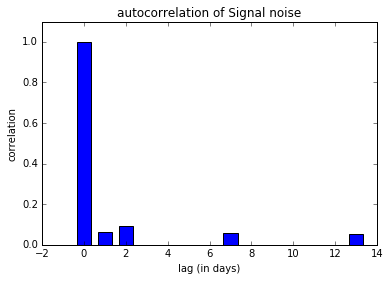

In [27]:
daylag=numpy.arange(14)
acf_noise=numpy.array([noise.autocorr(d) for d in daylag])
width=0.7
plt.bar(daylag-width/2, acf_noise, width, color='b')
plt.ylim(0,1.1)
plt.xlabel("lag (in days)")
plt.ylabel("correlation")
plt.title("autocorrelation of Signal noise")
plt.show()

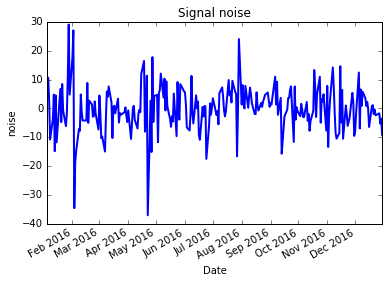

In [20]:
fig, ax = plt.subplots()
plt.plot(noise.index,noise,label="dW",linewidth=2)
plt.ylabel("noise")
plt.xlabel("Date")
plt.title("Signal noise")
fig.autofmt_xdate()
plt.show()

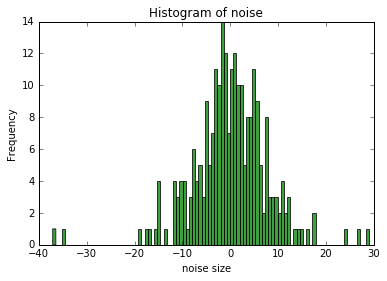

In [21]:
plt.hist(noise, 100, facecolor='green', alpha=0.75)
plt.xlabel("noise size")
plt.ylabel("Frequency")
plt.title("Histogram of noise")
plt.show()

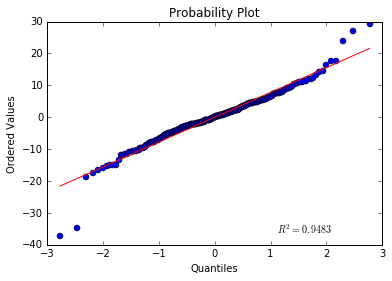

In [22]:
scipy.stats.probplot(numpy.array(noise), dist="norm", plot=plt)
plt.show()

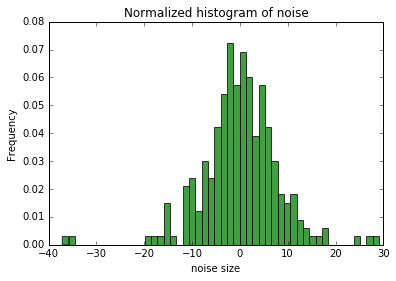

In [23]:
plt.hist(noise, 50, normed=1, facecolor='green', alpha=0.75)
plt.xlabel("noise size")
plt.ylabel("Frequency")
plt.title("Normalized histogram of noise")
plt.show()

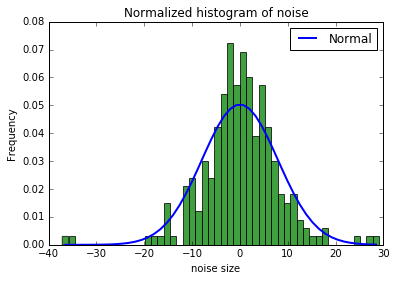

In [24]:
n, bins, patches=plt.hist(noise, 50, normed=True, facecolor='green', 
                          alpha=0.75,label="empirical")

mids=(bins[1:]+bins[:-1])/2
widths=bins[1:]-bins[:-1]

std=numpy.std(noise)
n_heights=(scipy.stats.norm.cdf(bins[1:],scale=std)-
           scipy.stats.norm.cdf(bins[:-1],scale=std))/widths
plt_normal,=plt.plot(mids,n_heights,color='blue',label="Normal",linewidth=2)
plt.legend(handles=[plt_normal],loc="upper right")

plt.xlabel("noise size")
plt.ylabel("Frequency")
plt.title("Normalized histogram of noise")
plt.show()


In [28]:
print("slope_S: "+str(slope_S))
print("intercept_S: "+str(intercept_S))
print("noise std: "+str(std))

slope_S: 0.843995288039
intercept_S: -0.0660867521825
noise std: 7.9219078526056395


## SDE: Ornstein-Uhlenbeck process

In [29]:
delta=1/252
print("delta: "+str(delta))
elasticity=(1-slope_S)/delta
print("elasticity: "+str(elasticity))
mean=intercept_S/elasticity/delta
print("mean: "+str(mean))
diff=std/numpy.sqrt(delta)
print("diff: "+str(diff))

delta: 0.003968253968253968
elasticity: 39.3131874143
mean: -0.423620231412
diff: 125.756388523


In [31]:
noise.to_pickle("noise.p")